In [ ]:
!pip install batchflow

In [ ]:
import batchflow

from batchflow.models.tf import ResNet34

my_workflow = my_dataset.pipeline()
              .init_model('dynamic', ResNet34, config={
                          'inputs/images/shape': B('image_shape'),
                          'labels/classes': 10,
                          'initial_block/inputs': 'images'})
              .load('/some/path')
              .some_transform()
              .another_transform()
              .train_model('ResNet34', images=B('images'), labels=B('labels'))
              .run(BATCH_SIZE, shuffle=True)

In [ ]:
# 기존 keras, tensorflow 삭제하기
!pip uninstall keras-nightly
!pip uninstall -y tensorflow

In [ ]:
!pip3 uninstall keras-nightly
!pip3 uninstall -y tensorflow
!pip3 install keras==2.1.6
!pip3 install tensorflow==1.15.0

In [ ]:
!pwd

/content


In [ ]:
!pip install tensorboard==1.15.0 tensorflow==1.15.0 tensorflow-estimator==1.15.1 tensorflow-gpu==1.15.2 tensorflow-gpu-estimator==2.1.0 Keras==2.1.5 Keras-Applications==1.0.8 Keras-Preprocessing==1.1.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.4-tf


In [ ]:
!pip install h5py==2.10.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Study/DenseNet/

/content/drive/MyDrive/Study/DenseNet


In [ ]:
from keras.utils import plot_model
model = densenet.DenseNetFCN((32, 32, 3), growth_rate=16, nb_layers_per_block=[4, 5, 7, 10, 12, 15], upsampling_type='deconv')
model.summary()

1. densetnet    

  crop X 500 * 600 size

input:(125,100,4)

depth=16, growth_rate=4, bottleneck=True, reduction=0.5


In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/"
img_size = (125,100)

imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')


valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')


testGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=16, growth_rate=4,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)
epochs = 50
history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )

model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4).h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))
# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()




history:  {'val_loss': [0.9903620779514313, 3.13200443983078, 1.208173006772995, 1.344835877418518, 2.6277745366096497, 1.1738187074661255, 0.9683040231466293, 2.321050703525543, 1.4025775492191315, 0.758510485291481, 1.7892092913389206, 1.5944638550281525, 0.9988285601139069, 1.8418808579444885, 0.8349211812019348, 2.8792727291584015, 0.8982901126146317, 0.861475020647049, 2.0260039269924164, 0.9900240749120712], 'val_acc': [0.5703125, 0.1796875, 0.5859375, 0.5703125, 0.578125, 0.671875, 0.6328125, 0.5703125, 0.5625, 0.6640625, 0.5859375, 0.578125, 0.609375, 0.6015625, 0.65625, 0.5859375, 0.6171875, 0.6171875, 0.59375, 0.6328125], 'loss': [1.053879731745551, 0.914807193599173, 0.8296088706987343, 0.7732352882670903, 0.7363783780129196, 0.7040710697650153, 0.6842786097729029, 0.6701586459971457, 0.6575772574951708, 0.6424817775395328, 0.6270169998940751, 0.6261925259974037, 0.6068580737001323, 0.5955075820916806, 0.5937285664153363, 0.5908726974573957, 0.5733944250362233, 0.56285828213

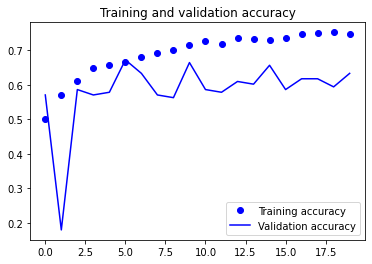

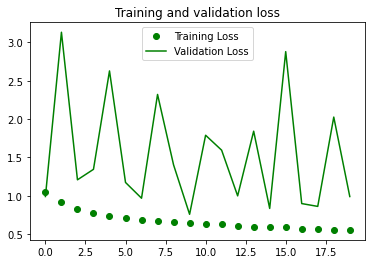

In [ ]:
print("history: ",history.history)
print("\n Valid Accuracy: ",(model.evaluate_generator(valGen, steps=5))[1])
print("\n Test Accuracy: ", model.evaluate_generator(testGen, steps=5))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

2. densenet

  Collar_crop

    input:(125,100,4)

    epoch=30 (earlystopping)


depth=***16***, growth_rate=4, bottleneck=True, reduction=0.5, 

Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
(125, 100, 4)


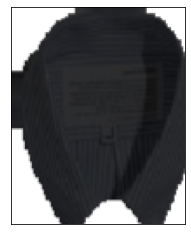

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_272 (Conv2D)             (None, 125, 100, 8)  288         input_24[0][0]                   
__________________________________________________________________________________________________
batch_normalization_272 (BatchN (None, 125, 100, 8)  32          conv2d_272[0][0]                 
__________________________________________________________________________________________________
activation_271 (Activation)     (None, 125, 100, 8)  0           batch_normalization_272[0][0]    
__________________________________________________________________________________________________
conv2d_273

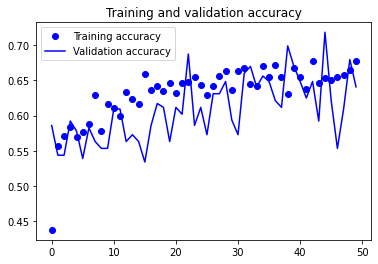

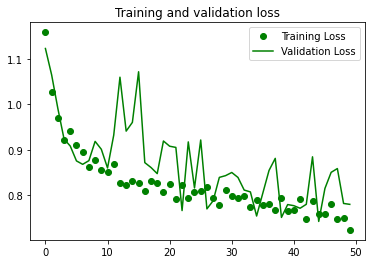

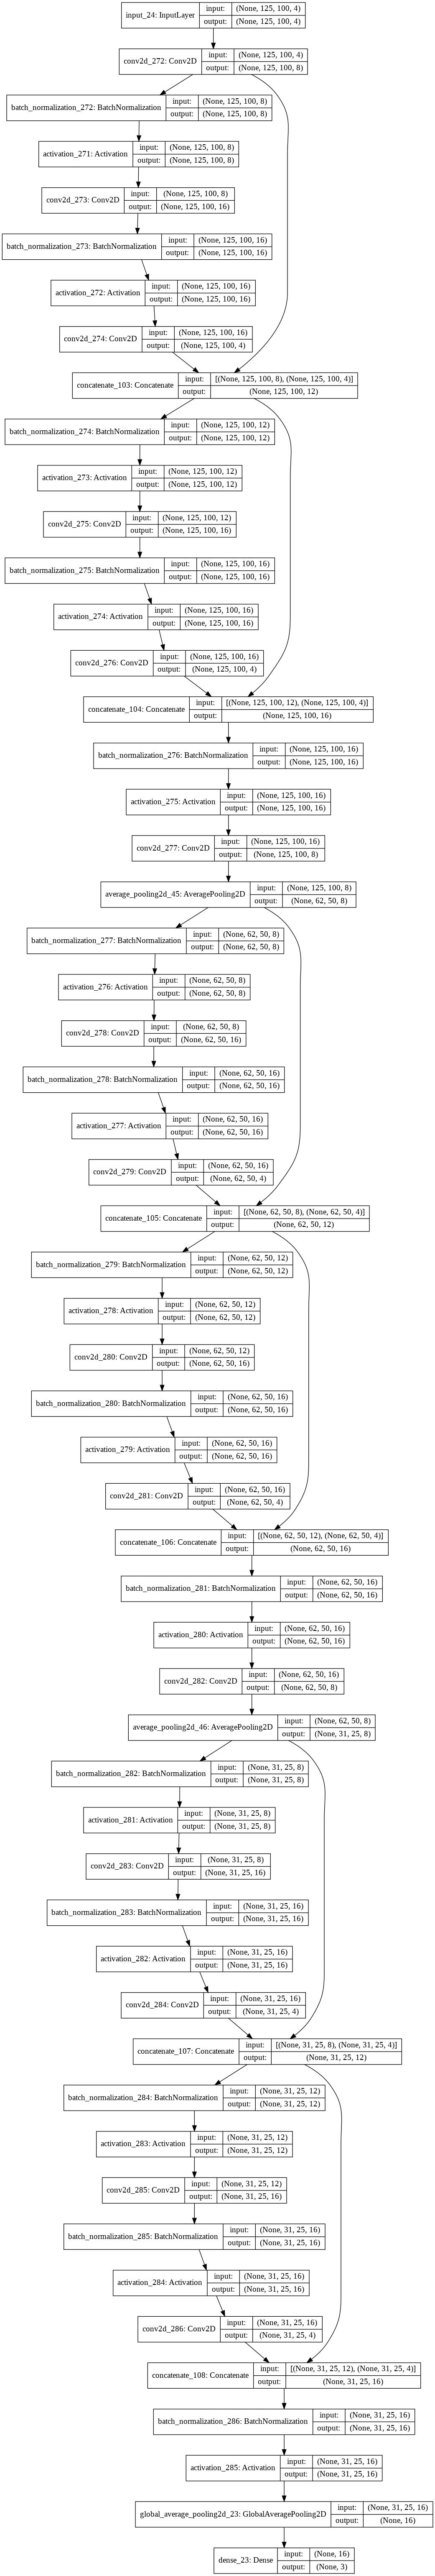

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=16, growth_rate=4,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(16,4,T,0.5).h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#####모델구조저장
from IPython.display import Image
from keras.utils import plot_model

file_name='/content/drive/MyDrive/Study/DenseNet/images/densenet_crop_collar_(125,100,4)_(13,4,T,0.5).jpg'
plot_model(model, show_shapes=True, show_layer_names=True, to_file=file_name)
Image(retina=True, filename=file_name)


3. densenet

  Collar_crop

    input:(125,100,4)

    epoch=50 (earlystopping)


depth=***34,*** growth_rate=4, bottleneck=True, reduction=0.5, 

Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
(125, 100, 4)


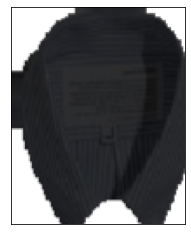

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_287 (Conv2D)             (None, 125, 100, 8)  288         input_25[0][0]                   
__________________________________________________________________________________________________
batch_normalization_287 (BatchN (None, 125, 100, 8)  32          conv2d_287[0][0]                 
__________________________________________________________________________________________________
activation_286 (Activation)     (None, 125, 100, 8)  0           batch_normalization_287[0][0]    
__________________________________________________________________________________________________
conv2d_288

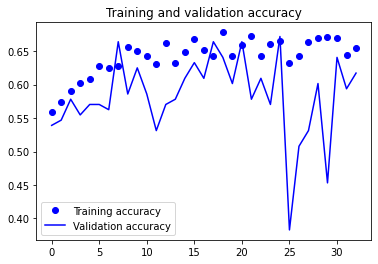

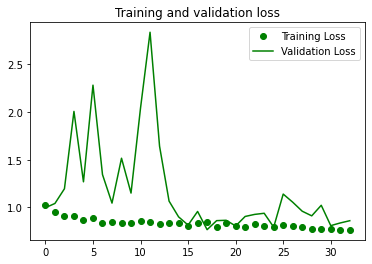

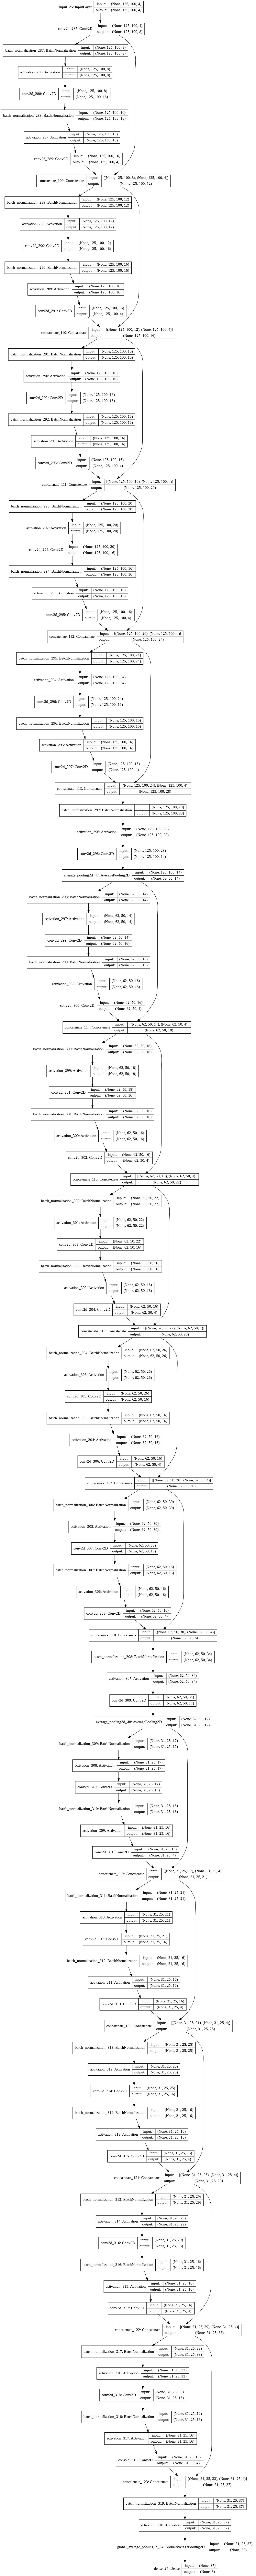

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=34, growth_rate=4,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(34,4,T,0.5).h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#####모델구조저장
from IPython.display import Image
from keras.utils import plot_model

file_name='/content/drive/MyDrive/Study/DenseNet/images/densenet_crop_collar_(125,100,4)_(34,4,T,0.5).jpg'
plot_model(model, show_shapes=True, show_layer_names=True, to_file=file_name)
Image(retina=True, filename=file_name)


4. densenet

  Collar_crop

    input:(125,100,4)

    epoch=50 (earlystopping)


depth=***7,*** growth_rate=4, bottleneck=True, reduction=0.5, 

Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
(125, 100, 4)


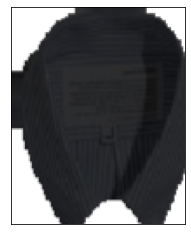

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 125, 100, 4)       0         
_________________________________________________________________
conv2d_320 (Conv2D)          (None, 125, 100, 8)       288       
_________________________________________________________________
batch_normalization_320 (Bat (None, 125, 100, 8)       32        
_________________________________________________________________
activation_319 (Activation)  (None, 125, 100, 8)       0         
_________________________________________________________________
conv2d_321 (Conv2D)          (None, 125, 100, 4)       32        
_________________________________________________________________
average_pooling2d_49 (Averag (None, 62, 50, 4)         0         
_________________________________________________________________
batch_normalization_321 (Bat (None, 62, 50, 4)         16        
__________

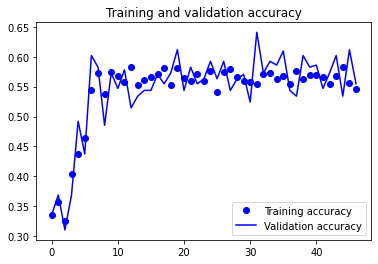

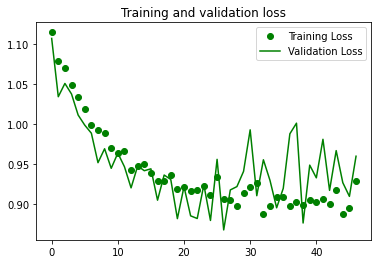

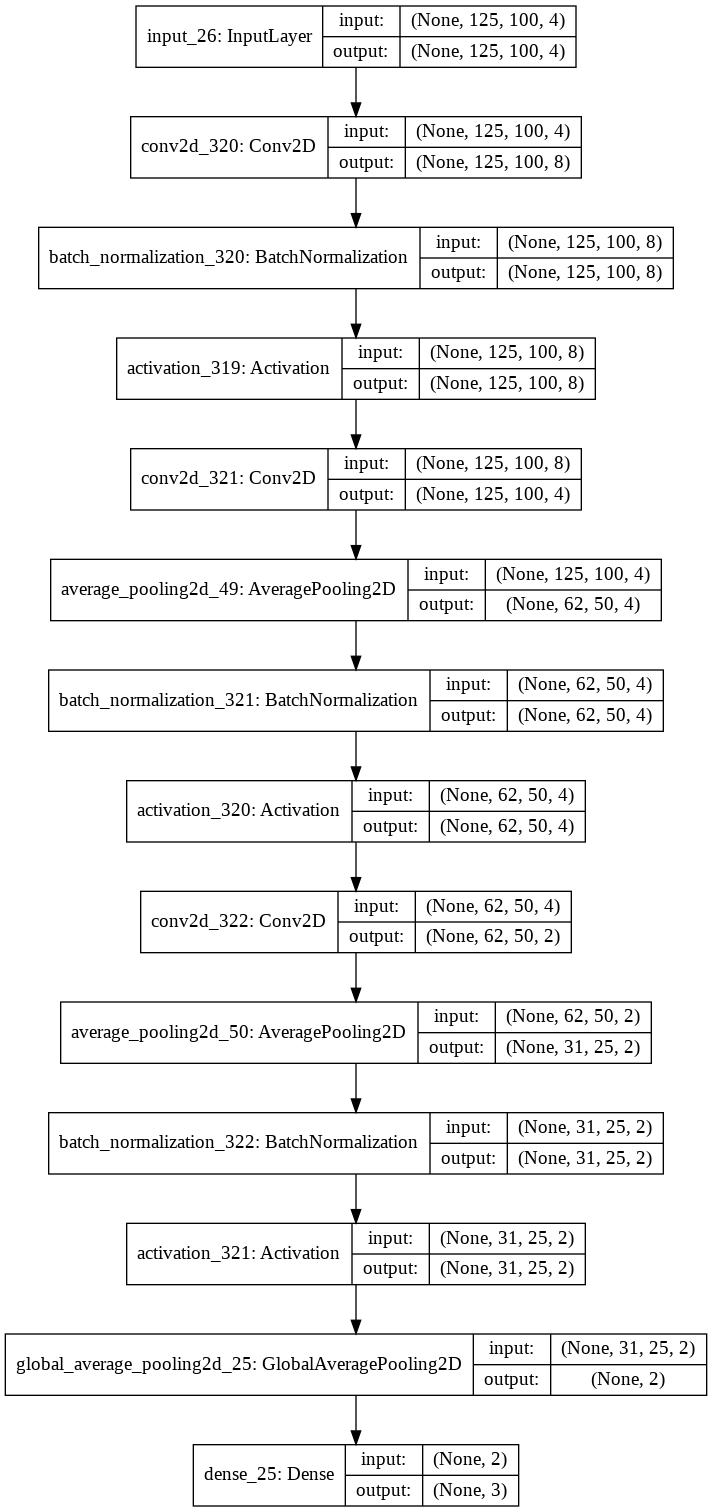

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=7, growth_rate=4,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(7,4,T,0.5).h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#####모델구조저장
from IPython.display import Image
from keras.utils import plot_model

file_name='/content/drive/MyDrive/Study/DenseNet/images/densenet_crop_collar_(125,100,4)_(7,4,T,0.5).jpg'
plot_model(model, show_shapes=True, show_layer_names=True, to_file=file_name)
Image(retina=True, filename=file_name)


5. densenet

  Collar_crop

    input:(125,100,4)

    epoch=50 (earlystopping)


depth=***64,*** growth_rate=4, bottleneck=True, reduction=0.5, 

Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
(125, 100, 4)


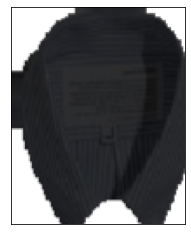

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_323 (Conv2D)             (None, 125, 100, 8)  288         input_27[0][0]                   
__________________________________________________________________________________________________
batch_normalization_323 (BatchN (None, 125, 100, 8)  32          conv2d_323[0][0]                 
__________________________________________________________________________________________________
activation_322 (Activation)     (None, 125, 100, 8)  0           batch_normalization_323[0][0]    
__________________________________________________________________________________________________
conv2d_324

TypeError: ignored

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=64, growth_rate=4,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,4,T,0.5).h5")



In [ ]:
print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



Output hidden; open in https://colab.research.google.com to view.

6. densenet

  Collar_crop

    input:(125,100,4)

    epoch=50 (earlystopping)


depth=***64,*** growth_rate=***8***, bottleneck=True, reduction=0.5, 

Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_190 (Conv2D)             (None, 125, 100, 16) 576         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_190 (BatchN (None, 125, 100, 16) 64          conv2d_190[0][0]                 
__________________________________________________________________________________________________
activation_190 (Activation)     (None, 125, 100, 16) 0           batch_normalization_190[0][0]    
__________________________________________________________________________________________________
conv2d_191

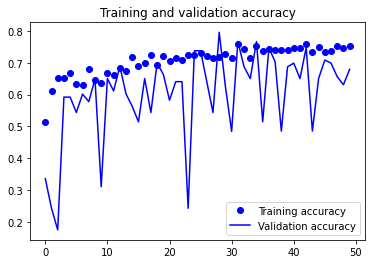

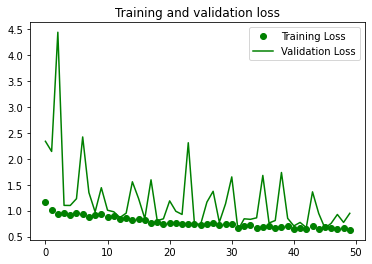

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
#model_checkpoint = ModelCheckpoint(verbose=1, monitor="val_loss",filepath="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,8,T,0.5)_best.h5", save_best_only=True)
#rlr = ReduceLROnPlateau(monitor="val_loss",verbose=1,factor=0.1, patience=5,min_lr=0.001)


rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
image_dim=(img_size[0],img_size[1],4)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=64, growth_rate=8,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping])
          
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,8,T,0.5).h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

7. densenet

  Collar_crop

    input:(125,100,4)

    epoch=50 (earlystopping)


depth=***64,*** growth_rate=***12***, bottleneck=True, reduction=0.5, 

Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 125, 100, 24) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_64 (BatchNo (None, 125, 100, 24) 96          conv2d_64[0][0]                  
__________________________________________________________________________________________________
activation_64 (Activation)      (None, 125, 100, 24) 0           batch_normalization_64[0][0]     
__________________________________________________________________________________________________
conv2d_65 

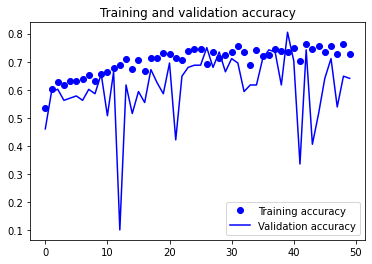

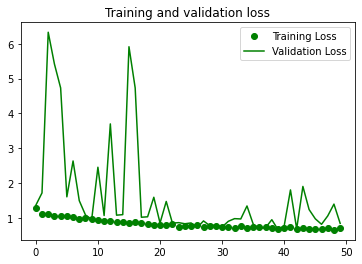

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
#model_checkpoint = ModelCheckpoint(verbose=1, monitor="val_loss",filepath="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,8,T,0.5)_best.h5", save_best_only=True)
#rlr = ReduceLROnPlateau(monitor="val_loss",verbose=1,factor=0.1, patience=5,min_lr=0.001)


rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
image_dim=(img_size[0],img_size[1],4)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=64, growth_rate=12,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping])
          
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,12,T,0.5).h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

8. densenet

  Collar_crop

    input:(125,100,4)

    epoch=50 (earlystopping)


depth=***64,*** growth_rate=***16***, bottleneck=True, reduction=0.5, 

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term
Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.








/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 125, 100, 32) 1152        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 125, 100, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 125, 100, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
con

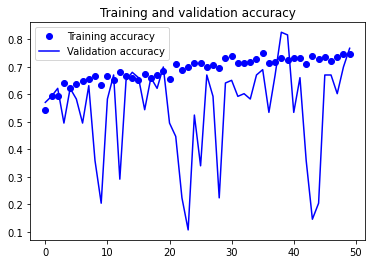

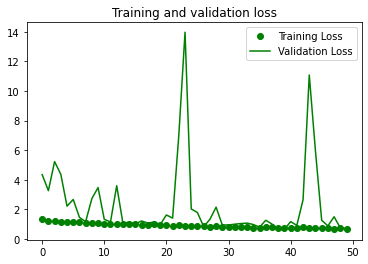

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
#model_checkpoint = ModelCheckpoint(verbose=1, monitor="val_loss",filepath="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,8,T,0.5)_best.h5", save_best_only=True)
#rlr = ReduceLROnPlateau(monitor="val_loss",verbose=1,factor=0.1, patience=5,min_lr=0.001)


rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
image_dim=(img_size[0],img_size[1],4)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=64, growth_rate=16,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping])
          
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,16,T,0.5).h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

9. densenet

  Collar_crop

    input:(125,100,4)

    epoch=50 (earlystopping)


depth=***64,*** growth_rate=4, bottleneck=True, reduction=***0.75***, 

Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 125, 100, 8)  288         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_64 (BatchNo (None, 125, 100, 8)  32          conv2d_64[0][0]                  
__________________________________________________________________________________________________
activation_64 (Activation)      (None, 125, 100, 8)  0           batch_normalization_64[0][0]     
__________________________________________________________________________________________________
conv2d_65 

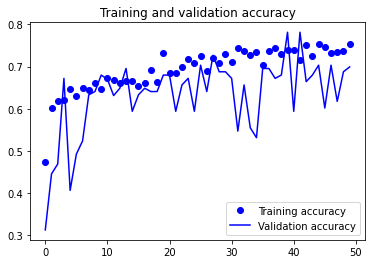

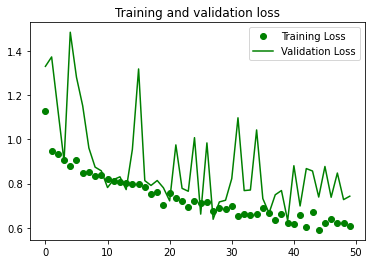

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
#model_checkpoint = ModelCheckpoint(verbose=1, monitor="val_loss",filepath="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,8,T,0.5)_best.h5", save_best_only=True)
#rlr = ReduceLROnPlateau(monitor="val_loss",verbose=1,factor=0.1, patience=5,min_lr=0.001)


rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
image_dim=(img_size[0],img_size[1],4)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=64, growth_rate=4,
			  bottleneck=True, reduction=0.75)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping])
          
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,4,T,0.75).h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

10. densenet

  Collar_crop

    input:(125,100,4)

    epoch=50 (earlystopping)


depth=***64,*** growth_rate=4, bottleneck=True, reduction=***0.25***, 

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.








/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 125, 100, 8)  288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 125, 100, 8)  32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 125, 100, 8)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
con

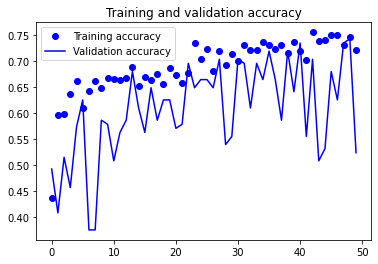

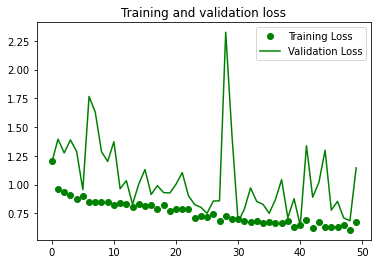

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
#model_checkpoint = ModelCheckpoint(verbose=1, monitor="val_loss",filepath="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,8,T,0.5)_best.h5", save_best_only=True)
#rlr = ReduceLROnPlateau(monitor="val_loss",verbose=1,factor=0.1, patience=5,min_lr=0.001)


rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
image_dim=(img_size[0],img_size[1],4)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=64, growth_rate=4,
			  bottleneck=True, reduction=0.25)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping])
          
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,4,T,0.25).h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

11. densenet number 2 와 비교.***` dense block 3->6`***

  Collar_crop

    input:(125,100,4)

    epoch=50 (earlystopping)


depth=***16,*** growth_rate=4, bottleneck=True, reduction=0.5, 

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
(125, 100, 4)


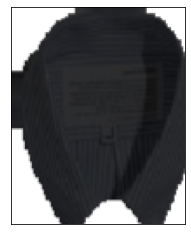

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 125, 100, 8)  288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 125, 100, 8)  32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 125, 100, 8)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
con

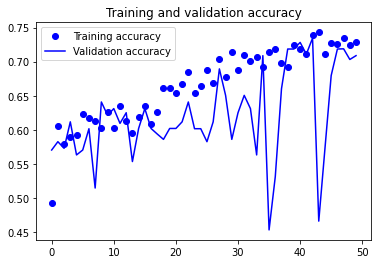

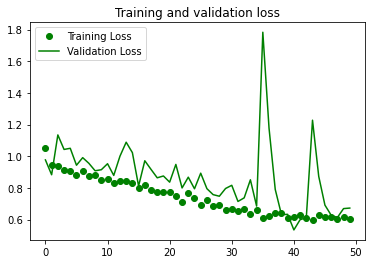

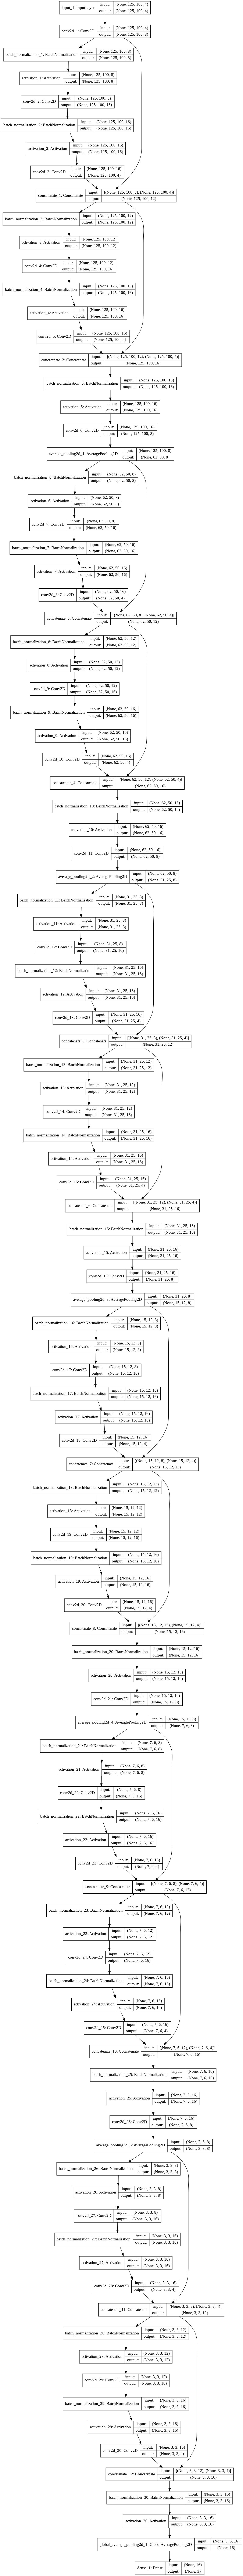

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, nb_dense_block=6, input_shape=image_dim, depth=16, growth_rate=4,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(16,4,T,0.5)_6denseblocks.h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#####모델구조저장
from IPython.display import Image
from keras.utils import plot_model

file_name='/content/drive/MyDrive/Study/DenseNet/images/densenet_crop_collar_(125,100,4)_(13,4,T,0.5)_6denseblocks.jpg'
plot_model(model, show_shapes=True, show_layer_names=True, to_file=file_name)
Image(retina=True, filename=file_name)


12. densenet number 2, 11 와 비교.***` dense block 3->6`***

  Collar_crop

    input:(125,100,4)

    epoch=50 (earlystopping)


depth=***16,*** growth_rate***=12,*** bottleneck=True, reduction=0.5, 

Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
(125, 100, 4)


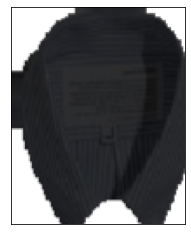

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 125, 100, 24) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_31 (BatchNo (None, 125, 100, 24) 96          conv2d_31[0][0]                  
__________________________________________________________________________________________________
activation_31 (Activation)      (None, 125, 100, 24) 0           batch_normalization_31[0][0]     
__________________________________________________________________________________________________
conv2d_32 

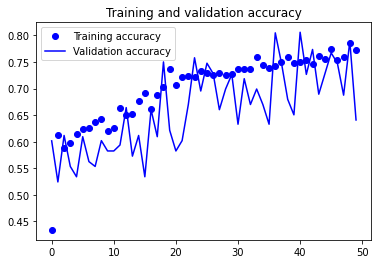

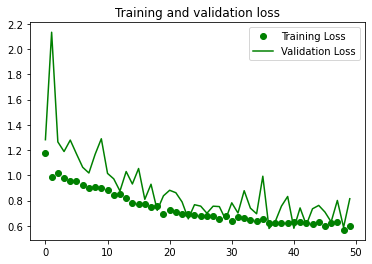

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, nb_dense_block=6, input_shape=image_dim, depth=16, growth_rate=12,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(16,12,T,0.5)_6denseblocks.h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


A-1. densenet number   ***2번과 다른 좀더 확실한 이미지로 거른 데이터셋*** 

**1, 2번과 비교**

  Collar_crop_filtered 

    input:(125,100,4)

    epoch=50 (earlystopping)




depth=***16,*** growth_rate=4, bottleneck=True, reduction=0.5, 

Found 1198 images belonging to 3 classes.
Found 151 images belonging to 3 classes.
Found 147 images belonging to 3 classes.
(125, 100, 4)


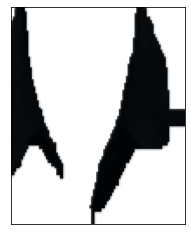

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 125, 100, 8)  288         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_61 (BatchNo (None, 125, 100, 8)  32          conv2d_61[0][0]                  
__________________________________________________________________________________________________
activation_61 (Activation)      (None, 125, 100, 8)  0           batch_normalization_61[0][0]     
__________________________________________________________________________________________________
conv2d_62 

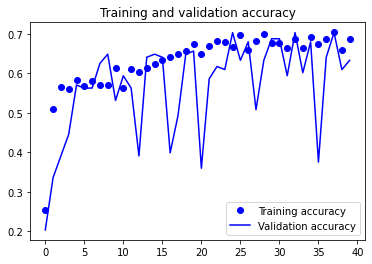

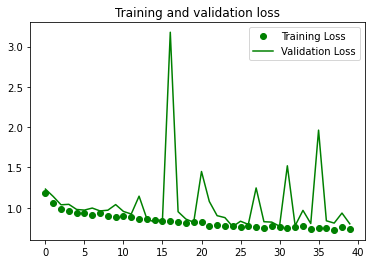

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, nb_dense_block=3, input_shape=image_dim, depth=16, growth_rate=4,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(16,4,T,0.5)_3denseblocks.h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


A-2. densenet number   ***2번과 다른 좀더 확실한 이미지로 거른 데이터셋***

  Collar_crop_filtered 

    input:(125,100,4)

    epoch=50 (earlystopping)




depth=***34,*** growth_rate=4, bottleneck=True, reduction=0.5, 

Found 1198 images belonging to 3 classes.
Found 151 images belonging to 3 classes.
Found 147 images belonging to 3 classes.
(125, 100, 4)


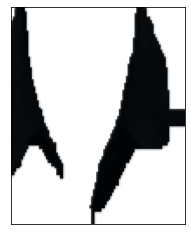

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 125, 100, 8)  288         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_76 (BatchNo (None, 125, 100, 8)  32          conv2d_76[0][0]                  
__________________________________________________________________________________________________
activation_76 (Activation)      (None, 125, 100, 8)  0           batch_normalization_76[0][0]     
__________________________________________________________________________________________________
conv2d_77 

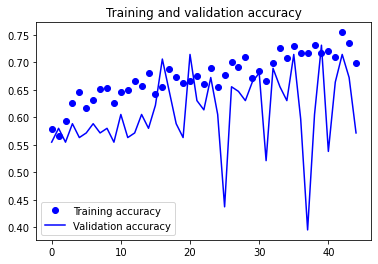

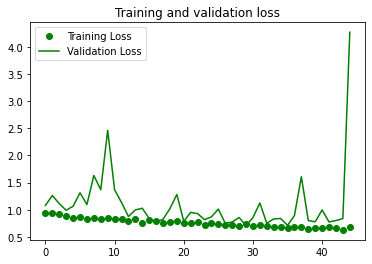

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, nb_dense_block=3, input_shape=image_dim, depth=34, growth_rate=4,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(34,4,T,0.5)_3denseblocks.h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


A-3. densenet number   ***2번과 다른 좀더 확실한 이미지로 거른 데이터셋***

  Collar_crop_filtered 

    input:(125,100,4)

    epoch=50 (earlystopping)




depth=***34,*** growth_rate***=8,*** bottleneck=True, reduction=0.5, 

Found 1198 images belonging to 3 classes.
Found 151 images belonging to 3 classes.
Found 147 images belonging to 3 classes.
(125, 100, 4)


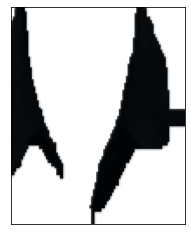

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_109 (Conv2D)             (None, 125, 100, 16) 576         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_109 (BatchN (None, 125, 100, 16) 64          conv2d_109[0][0]                 
__________________________________________________________________________________________________
activation_109 (Activation)     (None, 125, 100, 16) 0           batch_normalization_109[0][0]    
__________________________________________________________________________________________________
conv2d_110

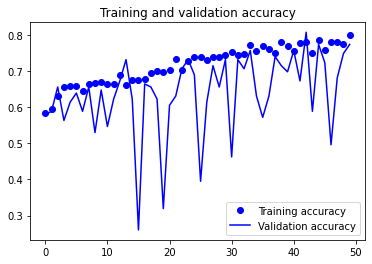

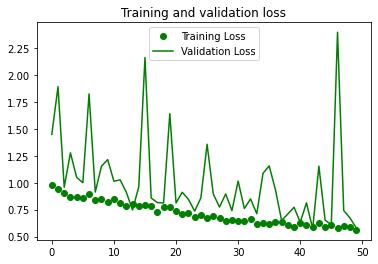

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, nb_dense_block=3, input_shape=image_dim, depth=34, growth_rate=8,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(34,8,T,0.5)_3denseblocks.h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


A-3. densenet number   ***2번과 다른 좀더 확실한 이미지로 거른 데이터셋. 거르기 전 이미지 비교!! ***

  Collar_crop 

    input:(125,100,4)

    epoch=50 (earlystopping)




depth=***34,*** growth_rate***=8,*** bottleneck=True, reduction=0.5, 

Found 1345 images belonging to 3 classes.
Found 167 images belonging to 3 classes.
Found 167 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_172 (Conv2D)             (None, 125, 100, 16) 576         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_172 (BatchN (None, 125, 100, 16) 64          conv2d_172[0][0]                 
__________________________________________________________________________________________________
activation_172 (Activation)     (None, 125, 100, 16) 0           batch_normalization_172[0][0]    
__________________________________________________________________________________________________
conv2d_173

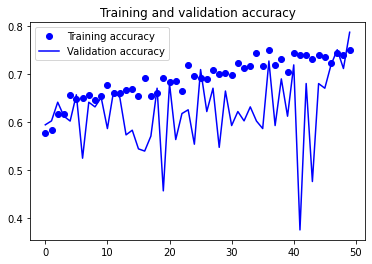

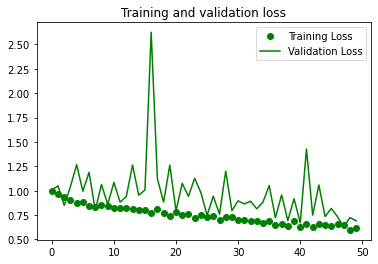

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
#model_checkpoint = ModelCheckpoint(verbose=1, monitor="val_loss",filepath="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_2/collar_model_(125,100,4)_(64,8,T,0.5)_best.h5", save_best_only=True)
#rlr = ReduceLROnPlateau(monitor="val_loss",verbose=1,factor=0.1, patience=5,min_lr=0.001)


rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/"
img_size = (125,100)
image_dim=(img_size[0],img_size[1],4)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

model = densenet.DenseNet(classes=3, input_shape=image_dim, depth=34, growth_rate=8,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping])
          
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/collar_model_(125,100,4)_(34,8,T,0.5)_3denseblocks.h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

A-4. densenet number   ***2번과 다른 좀더 확실한 이미지로 거른 데이터셋***


11번과 비교 

  Collar_crop_filtered 

    input:(125,100,4)

    epoch=50 (earlystopping)




depth=16, growth_rate=4, bottleneck=True, reduction=0.5, ***dense block= 6***

Found 1198 images belonging to 3 classes.
Found 151 images belonging to 3 classes.
Found 147 images belonging to 3 classes.
(125, 100, 4)


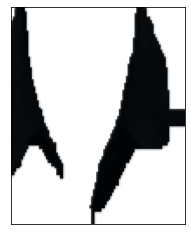

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_142 (Conv2D)             (None, 125, 100, 8)  288         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_142 (BatchN (None, 125, 100, 8)  32          conv2d_142[0][0]                 
__________________________________________________________________________________________________
activation_142 (Activation)     (None, 125, 100, 8)  0           batch_normalization_142[0][0]    
__________________________________________________________________________________________________
conv2d_143

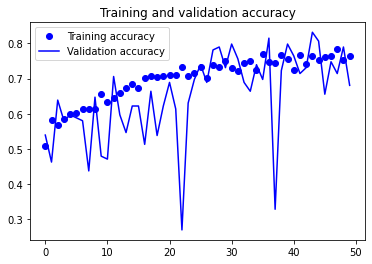

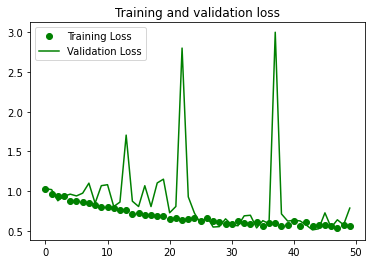

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')

x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, nb_dense_block=6, input_shape=image_dim, depth=16, growth_rate=4,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/collar_model_(125,100,4)_(16,4,T,0.5)_6denseblocks.h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


A-5. densenet number   ***2번과 다른 좀더 확실한 이미지로 거른 데이터셋***


  Collar_crop_filtered 

    input:(125,100,4)

    epoch=50 (earlystopping)




***depth=64,*** growth_rate=4, bottleneck=True, reduction=0.5, ***dense block= 6***

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


Found 1198 images belonging to 3 classes.
Found 151 images belonging to 3 classes.
Found 147 images belonging to 3 classes.
(125, 100, 4)


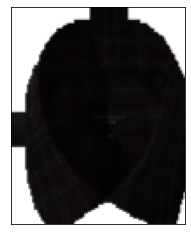

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 125, 100, 8)  288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 125, 100, 8)  32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 125, 100, 8)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
con

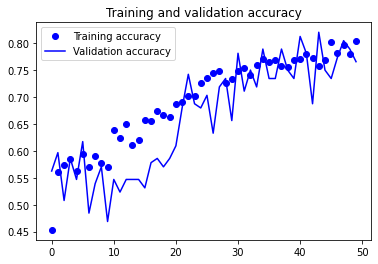

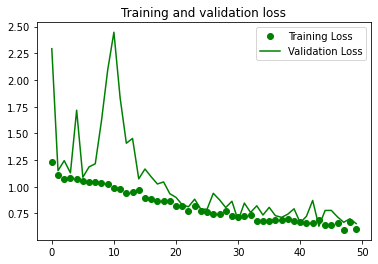

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')
trainGen.next()
x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, nb_dense_block=6, input_shape=image_dim, depth=64, growth_rate=4,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/collar_model_(125,100,4)_(64,4,T,0.5)_6denseblocks.h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


A-5. densenet number   ***2번과 다른 좀더 확실한 이미지로 거른 데이터셋***


  Collar_crop_filtered 

    input:(125,100,4)

    epoch=50 (earlystopping)




***depth=64,*** growth_rate***=12,*** bottleneck=True, reduction=0.5, ***dense block= 6***

Found 1198 images belonging to 3 classes.
Found 151 images belonging to 3 classes.
Found 147 images belonging to 3 classes.
(125, 100, 4)


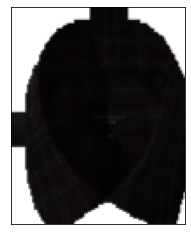

/usr/local/lib/python3.7/dist-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 125, 100, 4)  0                                            
__________________________________________________________________________________________________
conv2d_127 (Conv2D)             (None, 125, 100, 24) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_127 (BatchN (None, 125, 100, 24) 96          conv2d_127[0][0]                 
__________________________________________________________________________________________________
activation_127 (Activation)     (None, 125, 100, 24) 0           batch_normalization_127[0][0]    
__________________________________________________________________________________________________
conv2d_128

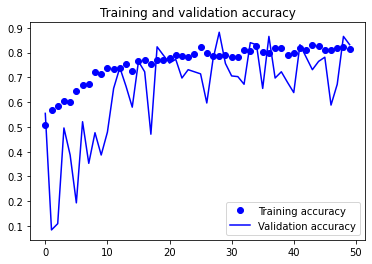

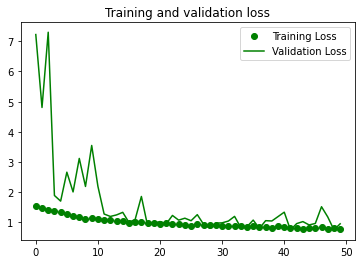

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')
x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],4)

model = densenet.DenseNet(classes=3, nb_dense_block=6, input_shape=image_dim, depth=64, growth_rate=12,
			  bottleneck=True, reduction=0.5)
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/collar_model_(125,100,4)_(64,12,T,0.5)_6denseblocks.h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()


In [ ]:
# 모델 불러오기
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/collar_model_(125,100,4)_(64,4,T,0.5)_6denseblocks.h5')   ## k=4
#model2 = load_model('/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/collar_model_(125,100,4)_(64,12,T,0.5)_6denseblocks.h5')  ## k=12

#테스트 데이터셋 불러오기

rootPath1 = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600/"
rootPath2 = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/"

img_size=(125,100)

imageGenerator1 = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)



In [ ]:
import os 

imageGenerator2 = ImageDataGenerator(rescale=1. / 255,)


In [ ]:
#testGen1 = imageGenerator1.flow_from_directory(os.path.join(rootPath1, 'test'), class_mode='categorical',target_size=img_size, shuffle=True, color_mode='rgba')
testGen2 = imageGenerator2.flow_from_directory(os.path.join(rootPath2, 'test'), class_mode='categorical',target_size=img_size, shuffle=False, color_mode='rgba', batch_size=500)

filenames = testGen2.filenames
nb = len(filenames)
print(nb)

# 모델 사용하기
#predict_1 = model1.predict_generator(testGen1, steps=5, verbose=1)
#predict_2 = model2.predict_generator(testGen1, steps=5, verbose=1)
predict_3 = model1.predict_generator(testGen2, steps=500, verbose=1)
#predict_4 = model2.predict_generator(testGen2, steps=nb, verbose=1)

Found 147 images belonging to 3 classes.
147
  5/500 [..............................] - ETA: 2:43:45

KeyboardInterrupt: ignored

In [ ]:
#print("크롭하지 않은 마스크 이미지 예측 k=4")
#np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
#print(testGen1.class_indices)
#print(predict_1)

#print("크롭하지 않은 마스크 이미지 예측 k=12")
#np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
#print(testGen1.class_indices)
#print(predict_2)

print("크롭한 마스크 이미지 예측 k=4")


np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(testGen2.class_indices)
print(predict_3)
print(testGen2.filenames)


print("크롭한 마스크 이미지 예측 k=12")
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(testGen2.class_indices)
print(predict_4)
print(testGen2.filenames)


크롭한 마스크 이미지 예측 k=4
{'etc': 0, 'straight': 1, 'wide': 2}
[[0.005 0.957 0.038]
 [0.055 0.395 0.550]
 [0.028 0.327 0.645]
 ...
 [0.001 0.784 0.214]
 [0.028 0.081 0.891]
 [0.002 0.163 0.835]]
['etc/splash_Musinsa_11.jpg.png', 'etc/splash_Musinsa_16.jpg.png', 'etc/splash_Musinsa_2.jpg.png', 'etc/splash_Musinsa_35.jpg.png', 'etc/splash_Musinsa_36.jpg.png', 'etc/splash_Musinsa_4.jpg.png', 'etc/splash_Musinsa_43.jpg.png', 'etc/splash_Musinsa_49.jpg.png', 'etc/splash_Musinsa_54.jpg.png', 'etc/splash_Musinsa_55.jpg.png', 'etc/splash_Musinsa_6.jpg.png', 'etc/splash_Musinsa_63.jpg.png', 'etc/splash_Musinsa_71.jpg.png', 'etc/splash_Musinsa_74.jpg.png', 'etc/splash_Musinsa_80.jpg.png', 'etc/splash_Musinsa_81.jpg.png', 'straight/splash_Musinsa_1.jpg.png', 'straight/splash_Musinsa_10.jpg.png', 'straight/splash_Musinsa_101.jpg.png', 'straight/splash_Musinsa_107.jpg.png', 'straight/splash_Musinsa_109.jpg.png', 'straight/splash_Musinsa_110.jpg.png', 'straight/splash_Musinsa_111.jpg.png', 'straight/splash

In [ ]:
from sklearn.metrics import confusion_matrix

def evaluate_predictions(model, generator):
    predictions = model.predict_generator(generator=generator,
                                    steps=generator.samples,
                                    max_queue_size=10,
                                    workers=0,
                                    use_multiprocessing=False,
                                    verbose=1)
    # Evaluate predictions
    predictedClass = np.argmax(predictions, axis=1)
    trueClass = generator.classes[generator.index_array]
    classLabels = generator.class_indices
    # Create confusion matrix
    #confusionMatrix = (confusion_matrix(
    #    y_true=trueClass,                                       # ground truth (correct) target values
    #    y_pred=predictedClass))  
    print("-----class----")
    print(classLabels)   
    print("-----Ground Truth----")                            # estimated targets as returned by a classifier
    print(trueClass)
    print("------predicted-------")
    print(predictedClass)

evaluate_predictions(model1, testGen2)

147/147 [==============================] - 33s 227ms/step
-----class----
{'etc': 0, 'straight': 1, 'wide': 2}
-----Ground Truth----
[1 2 2 0 1 1 1 2 1 0 1 1 1 1 1 0 1 1 0 2 1 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 2
 1 0 1 1 2 2 1 1 1 2 0 1 2 0 2 1 2 0 1 2 2 2 1 1 0 1 1 1 2 1 1 2 0 2 1 2 1
 2 1 2 1 1 0 2 2 1 2 2 1 1 2 1 2 2 2 1 1 2 1 0 1 1 1 1 1 2 1 1 1 2 0 1 1 1
 1 1 1 1 1 1 0 2 1 1 1 2 0 2 2 1 1 1 2 1 1 1 1 0 1 2 2 2 2 1 2 1 2 1 2 2]
------predicted-------
[1 1 1 ... 0 1 1]


In [ ]:
import cv2

path = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/test/straight/splash_Musinsa_15.jpg.png"
n = np.fromfile(path, np.uint8)
img = cv2.imread(n, cv2.IMREAD_UNCHANGED)

cv2_imshow(img)

test_img = cv2.resize(img, (125, 100))
test_img = test_img.astype('float32') / 255.
print(test_img.shape)
plt.imshow(test_img, interpolation='nearest')

test_img = test_img.reshape((1, 125, 100,4))

classLabels = testGen2.class_indices

result = model2.predict(test_img)

plt.title(classLabels[result_classes[0]] + ' - ' + str(round(max(result[0]), 4)))

plt.tight_layout()
plt.show()


SystemError: ignored

fcdensnet 도전

Found 1198 images belonging to 3 classes.
Found 151 images belonging to 3 classes.
Found 147 images belonging to 3 classes.
(125, 100, 4)


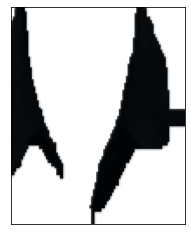

In [ ]:
from tensorflow import keras 
import densenet
import tensorflow.keras.models as models
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.python.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)

rootPath = "/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/"
img_size = (125,100)
epochs = 50
imageGenerator = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
)

trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'train'), class_mode='categorical',
                                              target_size=img_size, shuffle=True,
                                              color_mode='rgba')

valGen =  imageGenerator.flow_from_directory(os.path.join(rootPath, 'val'), class_mode='categorical',
                                          target_size=img_size, shuffle=True,
                                          color_mode='rgba')

testGen = imageGenerator.flow_from_directory(os.path.join(rootPath, 'test'), class_mode='categorical',
                                            target_size=img_size, shuffle=True,
                                            color_mode='rgba')
x, y = trainGen.next()
print(x[0].shape)
plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.show()

image_dim=(img_size[0],img_size[1],3)

model = densenet.DenseNetFCN(image_dim, growth_rate=3, nb_dense_block=1, nb_layers_per_block=[10,11], classes=3, upsampling_type='deconv')
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'],
)

history = model.fit_generator(trainGen,
                              epochs=epochs,
                              steps_per_epoch=trainGen.samples / epochs,
                              validation_data=valGen,
                              validation_steps=valGen.samples / epochs,
                              callbacks=[early_stopping]
                              )
##모델저장: collar_model_(w,h,c)_(depth,growth_rate,bottlenect(t/f),reduction).h5
model.save("/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop(filtered)/collar_model_densensetfc_(125,100,4).h5")

print("\n Valid Accuracy")
scores = model.evaluate_generator(valGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

print("\n Test Accuracy")
scores = model.evaluate_generator(testGen, steps=5)
print("%s: %.4f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.4f" %(model.metrics_names[0], scores[0]))

# graph
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()


In [ ]:
import os

import glob
from PIL import Image



In [ ]:

!apt-get install tree




Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
def convert_png_to_jpg(path):
    # jpg파일을 저장하기 위한 디렉토리의 생성
    if not os.path.exists(path+'_jpg'):
        os.mkdir(path+'_jpg') 

    # 모든 png 파일의 절대경로를 저장
    all_image_files=glob.glob(path+'/*.png') 

    for file_path in all_image_files:                   # 모든 png파일 경로에 대하여
        img = Image.open(file_path).convert('RGB')  # 이미지를 불러온다.

        directories=file_path.split('/')                # 절대경로상의 모든 디렉토리를 얻어낸다.
        directories[-2]+='_jpg'                     # 저장될 디렉토리의 이름 지정
        directories[-1]=directories[-1][:-4]  # 저장될 파일의 이름 지정
        save_filepath='/'.join(directories)          # 절대경로명으로 바꾸기
        img.save(save_filepath, quality=100)       # jpg파일로 저장한다.

In [ ]:
path="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/test/straight"
convert_png_to_jpg(path)

In [ ]:
path="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/test/wide"
convert_png_to_jpg(path)

In [ ]:
path="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/train/etc"
convert_png_to_jpg(path)

In [ ]:
path="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/train/straight"
convert_png_to_jpg(path)

In [ ]:
path="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/train/wide"
convert_png_to_jpg(path)

In [ ]:
path="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/val/etc"
convert_png_to_jpg(path)

In [ ]:
path="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/val/straight"
convert_png_to_jpg(path)

In [ ]:
path="/content/drive/MyDrive/Study/DenseNet/images/collars_500x600_crop/val/wide"
convert_png_to_jpg(path)